Grupo 3. Johanna Riera. Alvarez Alejandro

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from matplotlib.colors import TwoSlopeNorm

In [ ]:
# Lee el archivo Parquet
df_paso = pd.read_parquet("ResultadosElectorales.parquet")
df_general = pd.read_parquet("ResultadosElectorales_1v.parquet")

In [ ]:
# converison a entero
df_paso['votos_cantidad'] = df_paso['votos_cantidad'].astype(int)
df_paso['agrupacion_nombre']=df_paso['agrupacion_nombre'].fillna('NA')

In [ ]:
#obtenemos los resultados de presidente
resultado_paso=df_paso[df_paso['cargo_nombre']=='PRESIDENTE/A'].groupby(['distrito_nombre','votos_tipo','agrupacion_nombre']).agg({'votos_cantidad': 'sum'}).reset_index()

In [ ]:
resultado_paso.to_excel('resultados_paso.xlsx')

In [ ]:
# converison a entero
df_general['votos_cantidad'] = df_general['votos_cantidad'].astype(int)
df_general['agrupacion_nombre']=df_general['agrupacion_nombre'].fillna('NA')

In [ ]:
#obtenemos los resultados de presidente
resultado_gral=df_general[df_general['cargo_nombre']=='PRESIDENTE Y VICE'].groupby(['distrito_nombre','votos_tipo','agrupacion_nombre'])['votos_cantidad'].sum().reset_index()
resultado_gral.head()

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_cantidad
0,Buenos Aires,COMANDO,NA,8427
1,Buenos Aires,EN BLANCO,NA,269648
2,Buenos Aires,IMPUGNADO,NA,1481
3,Buenos Aires,NULO,NA,63865
4,Buenos Aires,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,352790


In [ ]:
resultado_gral.to_excel('reasultado_gral.xlsx')

Importamos los resultados de presidente para las paso y las general

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
resultado_gral=pd.read_csv('reasultado_gral.xlsx')
resultado_paso=pd.read_csv('resultados_paso.xlsx')

In [ ]:
#descatamos los votos no positivos
resultado_gral=resultado_gral[resultado_gral['agrupacion_nombre'].notnull()]
resultado_paso=resultado_paso[resultado_paso['agrupacion_nombre'].notnull()]

In [ ]:
#eliminamos las columnas de indice
resultado_paso=resultado_paso.drop(columns=['Unnamed: 0'])
resultado_gral=resultado_gral.drop(columns=['Unnamed: 0'])

In [ ]:
#renombramos columna de cantidad de votos
resultado_paso.columns=['distrito_nombre', 'votos_tipo', 'agrupacion_nombre', 'votos_paso']
resultado_gral.columns=['distrito_nombre', 'votos_tipo', 'agrupacion_nombre', 'votos_gral']

In [ ]:
#unificacion
resultados=resultado_gral.merge(resultado_paso, how='left',on=['distrito_nombre', 'votos_tipo', 'agrupacion_nombre'])

In [ ]:
resultados['variacion']=((resultados['votos_gral']/resultados['votos_paso'])-1)*100
resultados['diferencia']=resultados['votos_gral']-resultados['votos_paso']

In [ ]:
resultados['votos_paso']=resultados['votos_paso'].fillna(0)

In [ ]:
# Realiza la agregación
participacion = resultados.agg({'votos_gral': 'sum', 'votos_paso': 'sum'}).reset_index()

In [ ]:
#renombamos columna
participacion.columns=['votacion','cantidad']

In [ ]:
participacion['cantidad']=np.where(participacion['votacion']=='votos_paso',participacion['cantidad']*-1,participacion['cantidad'])

In [ ]:
print("Diferencia de votos entre elecciones:",str(participacion['cantidad'].sum()))

Diferencia de votos entre elecciones: 4480318


In [ ]:
# Cantidad de votos por agrupacion y variacion
variacion_agrupacion = resultados.groupby('agrupacion_nombre').agg({'votos_gral': 'sum', 'votos_paso': 'sum'}).reset_index()
variacion_agrupacion['variacion'] = ((variacion_agrupacion['votos_gral'] - variacion_agrupacion['votos_paso']) / variacion_agrupacion['votos_paso']) * 100

In [ ]:
#diferencia de votos
variacion_agrupacion['diferencia']=variacion_agrupacion['votos_gral']-variacion_agrupacion['votos_paso']

In [ ]:
variacion_agrupacion

,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,709932,628893,12.885976,81039
1,HACEMOS POR NUESTRO PAIS,1784315,907437,96.632383,876878
2,JUNTOS POR EL CAMBIO,6267152,6698029,-6.432892,-430877
3,LA LIBERTAD AVANZA,7884336,7116352,10.791821,767984
4,UNION POR LA PATRIA,9645983,6460689,49.302698,3185294


In [ ]:
# Asigna los colores a cada agrupación política
colores_agrupacion = {
    'UNION POR LA PATRIA': '#009cde',
    'JUNTOS POR EL CAMBIO': '#fedd00',
    'LA LIBERTAD AVANZA': '#753bbd',
    'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': '#f95461',
    'HACEMOS POR NUESTRO PAIS': '#43488f',
    'NA':'#DEB887'
}

In [ ]:
colores=['#f95461', '#43488f', '#fedd00', '#753bbd', '#009cde']

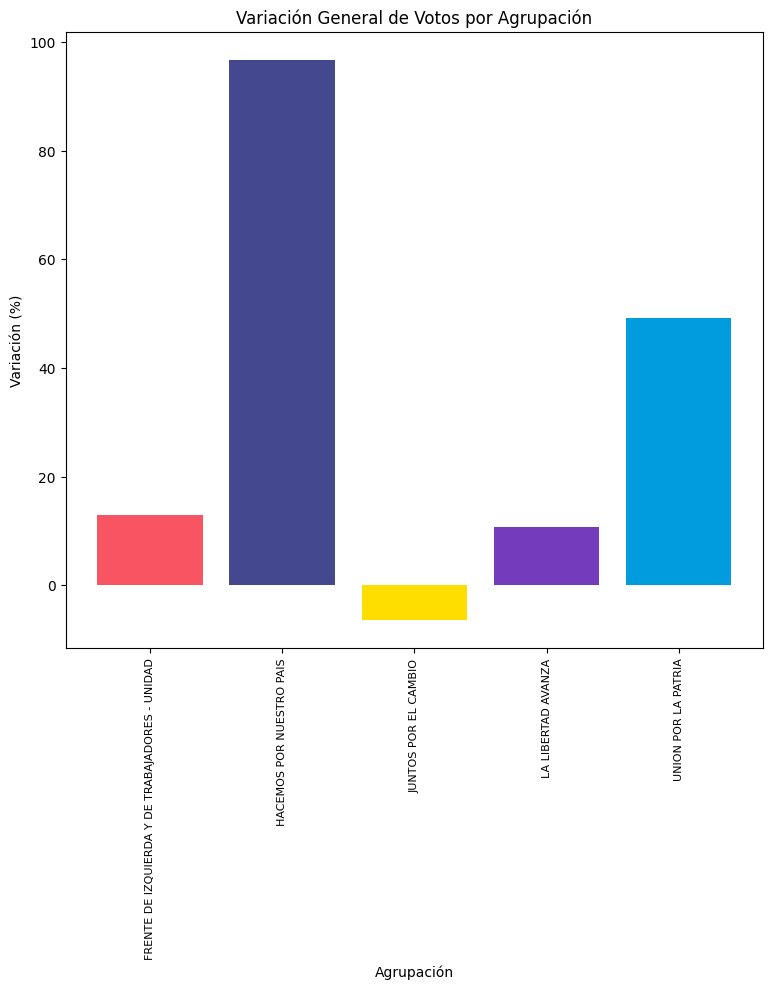

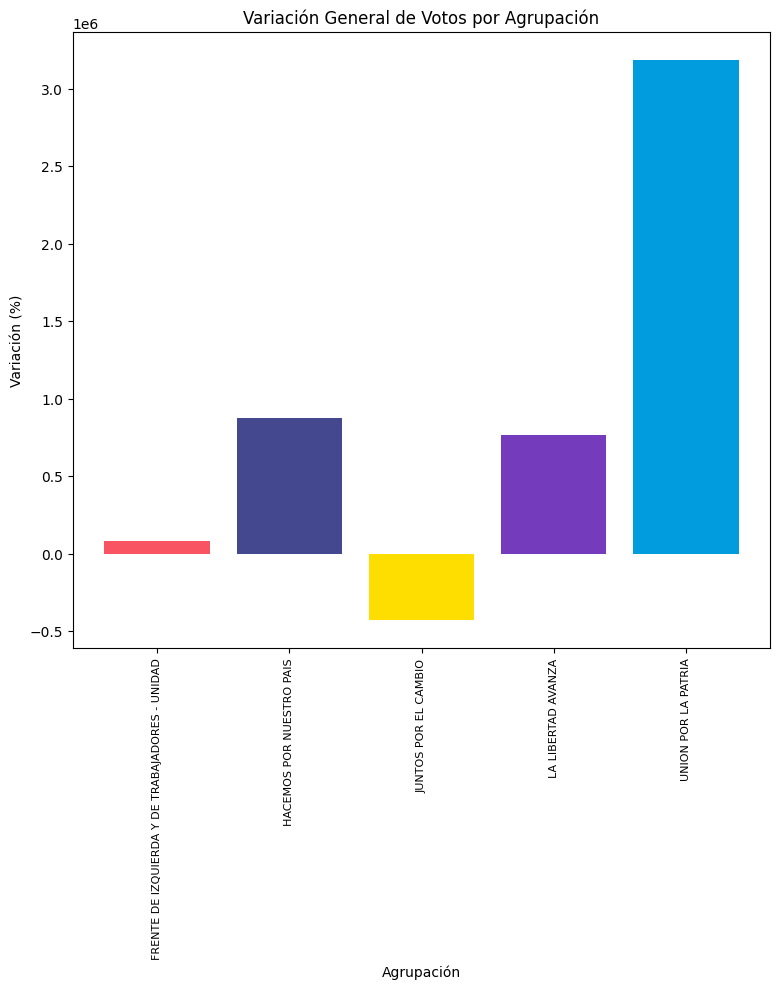

In [ ]:
# tamaño
plt.figure(figsize=(9, 8))
# Grafico de barra para variacion
bar = plt.bar(variacion_agrupacion['agrupacion_nombre'], variacion_agrupacion['variacion'], color=colores)
# Titulos
plt.title('Variación General de Votos por Agrupación')
plt.xlabel('Agrupación')
plt.ylabel('Variación (%)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

# tamaño
plt.figure(figsize=(9, 8))
# Grafico de barra para diferencia
bar = plt.bar(variacion_agrupacion['agrupacion_nombre'], variacion_agrupacion['diferencia'], color=colores)
# Titulos
plt.title('Variación General de Votos por Agrupación')
plt.xlabel('Agrupación')
plt.ylabel('Variación (%)')
plt.xticks(rotation=90, fontsize=8)
plt.show()

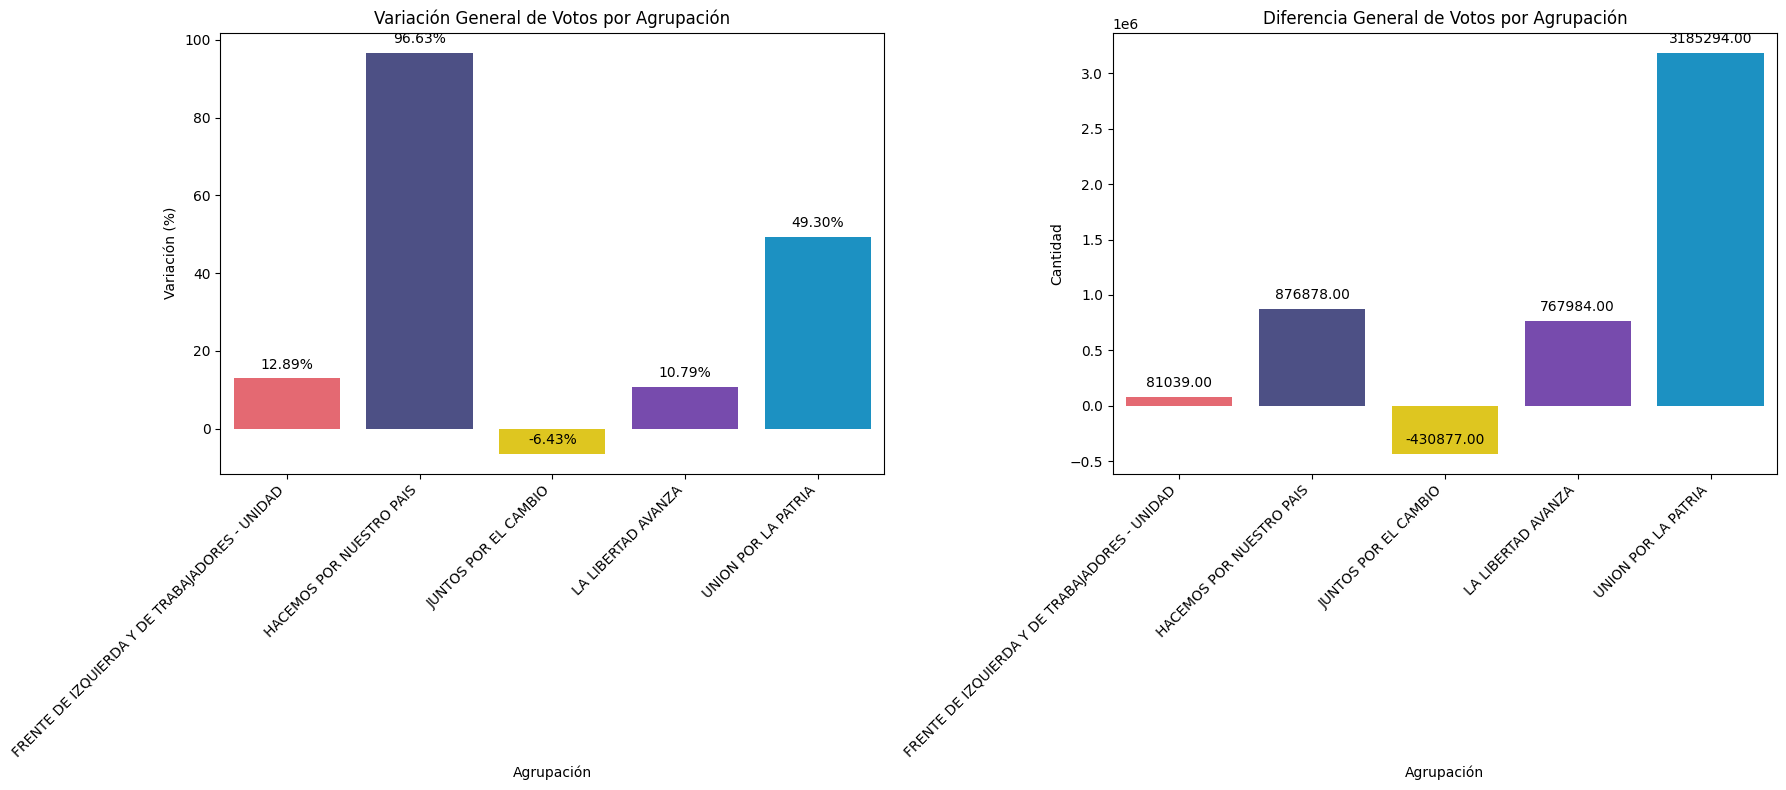

In [ ]:
# Configura para 2 visualizar 2 graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# grafico barras para variacion
ax1 = sns.barplot(x='agrupacion_nombre', y='variacion', data=variacion_agrupacion, palette=colores, ax=axes[0])

# Etiquetas de variación a cada barra
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax1.set_title('Variación General de Votos por Agrupación')
ax1.set_xlabel('Agrupación')
ax1.set_ylabel('Variación (%)')

# Formato del eje x, 45° para evitar superposicion
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# grafico barras para diferencia
ax2 = sns.barplot(x='agrupacion_nombre', y='diferencia', data=variacion_agrupacion, palette=colores, ax=axes[1])

#Etiquetas a cada barra
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax2.set_title('Diferencia General de Votos por Agrupación')
ax2.set_xlabel('Agrupación')
ax2.set_ylabel('Cantidad')

# Formato del eje x, 45° para evitar superposicion
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
resultados

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
0,Buenos Aires,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,352790,293601,20.159672,59189
1,Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,367457,97586,276.546841,269871
2,Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,2374023,2567840,-7.547861,-193817
3,Buenos Aires,POSITIVO,LA LIBERTAD AVANZA,2533633,2161679,17.206718,371954
4,Buenos Aires,POSITIVO,UNION POR LA PATRIA,4224688,2831078,49.225419,1393610
...,...,...,...,...,...,...,...
115,Tucumán,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,15152,16029,-5.471333,-877
116,Tucumán,POSITIVO,HACEMOS POR NUESTRO PAIS,42086,11302,272.376571,30784
117,Tucumán,POSITIVO,JUNTOS POR EL CAMBIO,153130,206969,-26.013074,-53839
118,Tucumán,POSITIVO,LA LIBERTAD AVANZA,365992,342681,6.802536,23311


In [ ]:
# Máxima diferencia de votos por agrupación y prov
max_diferencia_por_agrupacion = resultados.groupby(['agrupacion_nombre', 'distrito_nombre'])['diferencia'].max().reset_index()
#Maxima diferencia por partido
max_por_partido = max_diferencia_por_agrupacion.loc[max_diferencia_por_agrupacion.groupby('agrupacion_nombre')['diferencia'].idxmax()]
max_por_partido.columns=['agrupacion_nombre', 'distrito_nombre', 'cant_orig_dif']
#asignamos a cada partido donde obtuvo mas diferencias
origen_dif_positivas=variacion_agrupacion.merge(max_por_partido, on=['agrupacion_nombre'], how='left')
origen_dif_positivas['%']=(origen_dif_positivas['cant_orig_dif']/origen_dif_positivas['diferencia'])*100
#excluimos juntos por el cambio ya que es el que vario negativamente
origen_dif_positivas[origen_dif_positivas['agrupacion_nombre']!='JUNTOS POR EL CAMBIO']

,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia,distrito_nombre,cant_orig_dif,%
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,709932,628893,12.885976,81039,Buenos Aires,59189,73.037673
1,HACEMOS POR NUESTRO PAIS,1784315,907437,96.632383,876878,Buenos Aires,269871,30.776345
3,LA LIBERTAD AVANZA,7884336,7116352,10.791821,767984,Buenos Aires,371954,48.432519
4,UNION POR LA PATRIA,9645983,6460689,49.302698,3185294,Buenos Aires,1393610,43.751377


In [ ]:
# Minima diferencia de votos por agrupacion y prov
min_diferencia_por_agrupacion = resultados.groupby(['agrupacion_nombre', 'distrito_nombre'])['diferencia'].min().reset_index()
# Mimina diferenica de cada partido
min_por_partido = min_diferencia_por_agrupacion.loc[min_diferencia_por_agrupacion.groupby('agrupacion_nombre')['diferencia'].idxmin()]
min_por_partido.columns=['agrupacion_nombre', 'distrito_nombre', 'cant_orig_dif']
#asignamos a cada partido donde obtuvo menos diferencias
origen_dif_negativas=variacion_agrupacion.merge(min_por_partido, on=['agrupacion_nombre'], how='left')
origen_dif_negativas['%']=(origen_dif_negativas['cant_orig_dif']/origen_dif_negativas['diferencia'])*100
#seleccionamos juntos por el cambio que es el que cayo
origen_dif_negativas[origen_dif_negativas['agrupacion_nombre']=='JUNTOS POR EL CAMBIO']

,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia,distrito_nombre,cant_orig_dif,%
2,JUNTOS POR EL CAMBIO,6267152,6698029,-6.432892,-430877,Buenos Aires,-193817,44.981979


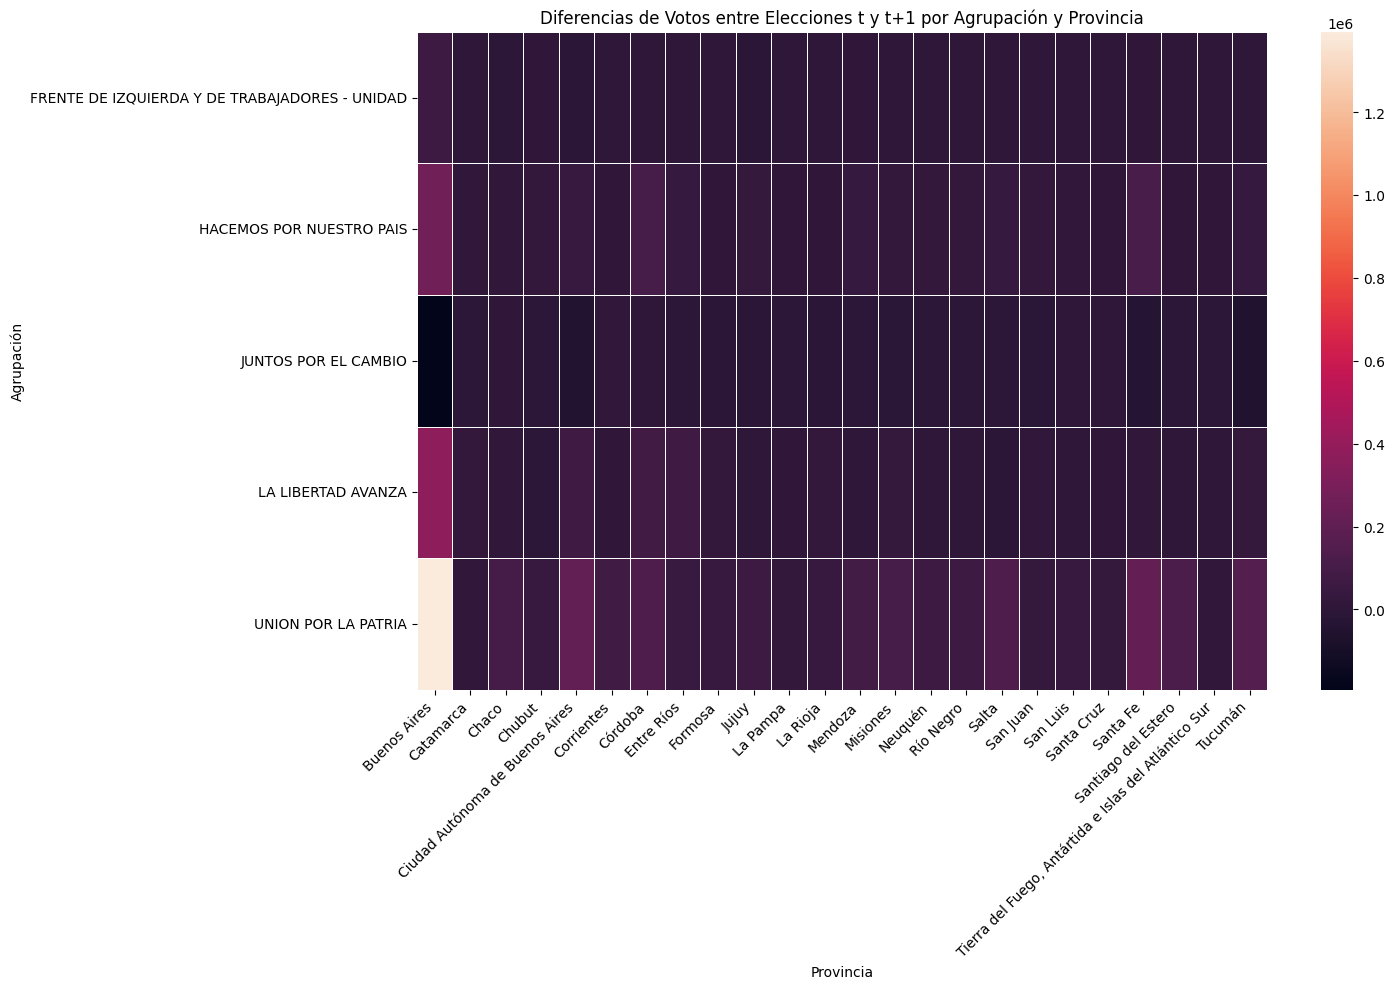

In [ ]:
# Se crea tabla pivot para el grafico de mapa de calor
df_pivot = resultados[['distrito_nombre', 'agrupacion_nombre', 'diferencia']].pivot_table(index='agrupacion_nombre', columns='distrito_nombre', values='diferencia')

#crea figura de mapa
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df_pivot,  linewidths=.5, cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0,)
plt.title('Diferencias de Votos entre Elecciones t y t+1 por Agrupación y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Agrupación')
plt.tight_layout()
plt.show()

En el grafico no se distingue entre los violetas.
Se probo otra escala de color con ayuda de chatgpt pero no se obtuvieron los resultados esperados

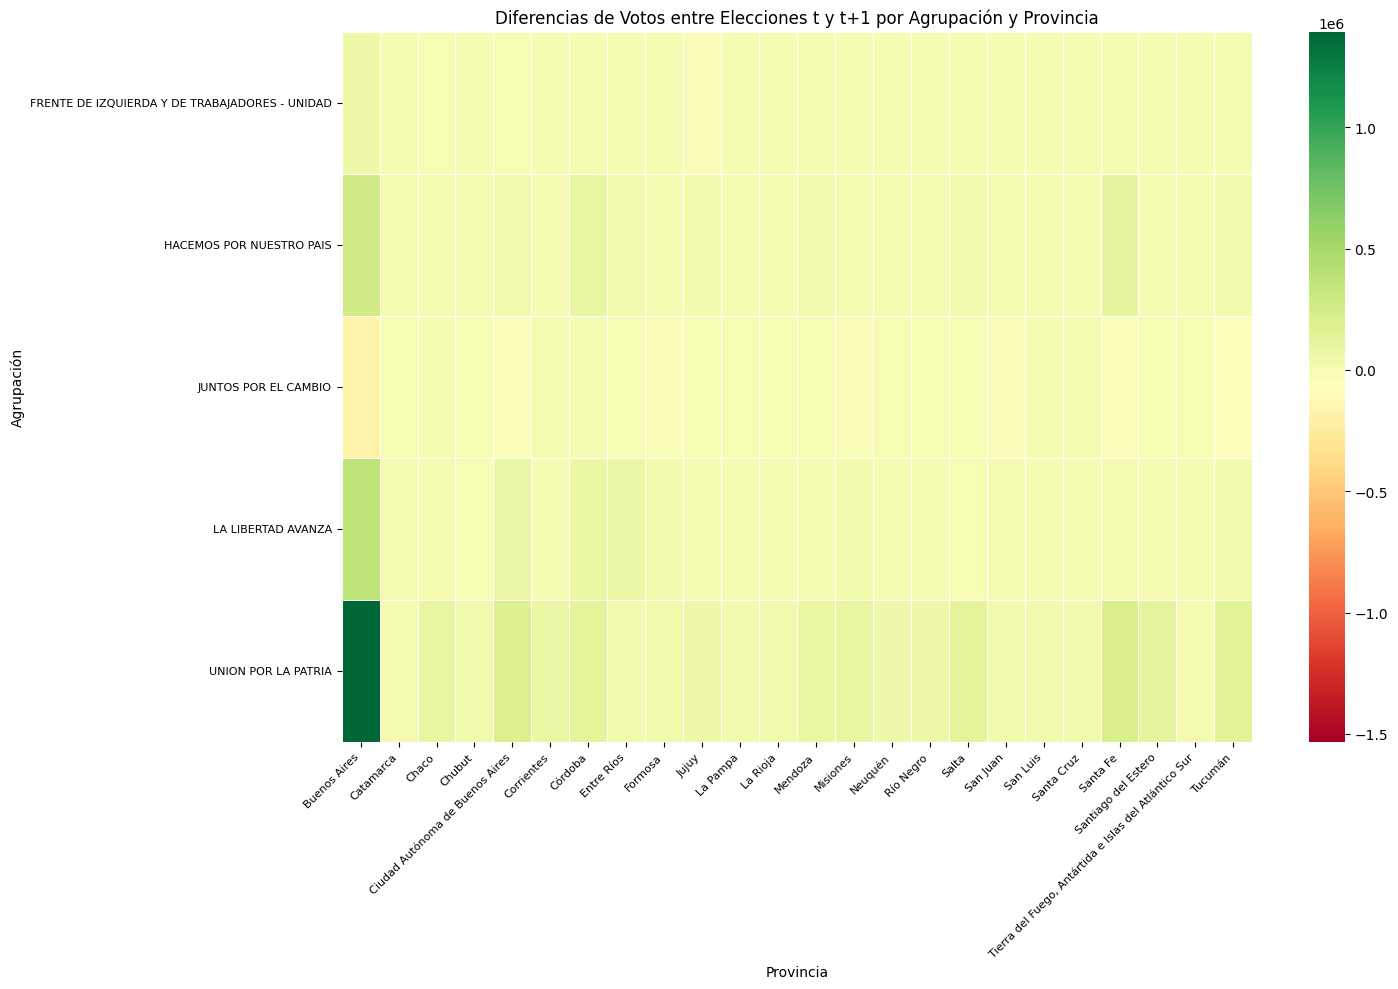

In [ ]:
# Crear un DataFrame pivot para que las agrupaciones estén en las filas, las provincias en las columnas y las diferencias como valores
df_pivot = resultados[['distrito_nombre', 'agrupacion_nombre', 'diferencia']].pivot_table(index='agrupacion_nombre', columns='distrito_nombre', values='diferencia')

# Obtener el valor absoluto máximo para normalizar la escala de color
vmax = max(df_pivot.values.max(), -df_pivot.values.min())

# Crear un mapa de calor usando seaborn con la paleta de colores "RdYlGn" e invertir la escala
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(df_pivot, cmap='RdYlGn', annot=False, fmt=".1f", linewidths=.5, cbar=True, vmin=vmax, vmax=-vmax)

# Ajustar el tamaño y la disposición de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.title('Diferencias de Votos entre Elecciones t y t+1 por Agrupación y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Agrupación')

# Ajustar el espacio entre las celdas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
#obtenemos la maxima variacion por provincia
indices_max_variacion = resultados.groupby('distrito_nombre')['variacion'].idxmax()
max_variacion_distrito = resultados.loc[indices_max_variacion]

In [ ]:
max_variacion_distrito

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
1,Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,367457,97586,276.546841,269871
6,Catamarca,POSITIVO,HACEMOS POR NUESTRO PAIS,14967,3530,323.994334,11437
11,Chaco,POSITIVO,HACEMOS POR NUESTRO PAIS,25804,8833,192.131779,16971
16,Chubut,POSITIVO,HACEMOS POR NUESTRO PAIS,26555,7587,250.006590,18968
21,Ciudad Autónoma de Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,57607,15886,262.627471,41721
26,Corrientes,POSITIVO,HACEMOS POR NUESTRO PAIS,19118,8929,114.111323,10189
34,Córdoba,POSITIVO,UNION POR LA PATRIA,308016,177528,73.502771,130488
36,Entre Ríos,POSITIVO,HACEMOS POR NUESTRO PAIS,44720,9425,374.482759,35295
41,Formosa,POSITIVO,HACEMOS POR NUESTRO PAIS,8793,3208,174.096010,5585
46,Jujuy,POSITIVO,HACEMOS POR NUESTRO PAIS,30775,7215,326.541927,23560


In [ ]:
#importamos georeferencias para mapa
df_provincias= gpd.read_file("pxpciadatosok.json")

In [ ]:
#asignamos los resultados de la maxima variacion por distrito
prov_gan = pd.merge( df_provincias,max_variacion_distrito, right_on='distrito_nombre', left_on='provincia', how='left')
prov_gan=prov_gan[prov_gan['provincia']!='Tierra del Fuego']# excluido

In [ ]:
# llenamoe los nulos
prov_gan['variacion'] = prov_gan['variacion'].fillna(0)

In [ ]:
# asignamos colores por partido
prov_gan['color'] = prov_gan['agrupacion_nombre'].map(colores_agrupacion)

In [ ]:
prov_gan

,id,link,provincia,mujeres,varones,personas,hogares,viv_part,viv_part_h,geometry,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia,color
0,None,02,Ciudad Autónoma de Buenos Aires,1560470,1329681,2890151,1150134,1423973,1082998,"POLYGON ((-58.46094 -34.53143, -58.46087 -34.5...",Ciudad Autónoma de Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,57607.0,15886.0,262.627471,41721.0,#43488f
1,None,10,Catamarca,185519,182309,367828,96001,113634,89376,"POLYGON ((-65.17652 -27.95409, -65.17652 -27.9...",Catamarca,POSITIVO,HACEMOS POR NUESTRO PAIS,14967.0,3530.0,323.994334,11437.0,#43488f
2,None,14,Córdoba,1703788,1605088,3308876,1031843,1232211,978553,"POLYGON ((-63.38656 -35.00445, -63.43325 -35.0...",Córdoba,POSITIVO,UNION POR LA PATRIA,308016.0,177528.0,73.502771,130488.0,#009cde
3,None,18,Corrientes,507520,485075,992595,267797,292644,248844,"POLYGON ((-57.81760 -30.72633, -57.82953 -30.7...",Corrientes,POSITIVO,HACEMOS POR NUESTRO PAIS,19118.0,8929.0,114.111323,10189.0,#43488f
4,None,22,Chaco,535309,519950,1055259,288422,312602,270133,"POLYGON ((-58.87882 -28.06539, -58.88245 -28.0...",Chaco,POSITIVO,HACEMOS POR NUESTRO PAIS,25804.0,8833.0,192.131779,16971.0,#43488f
5,None,30,Entre Ríos,631428,604566,1235994,375121,425591,357250,"POLYGON ((-58.37508 -34.00691, -58.37765 -34.0...",Entre Ríos,POSITIVO,HACEMOS POR NUESTRO PAIS,44720.0,9425.0,374.482759,35295.0,#43488f
6,None,34,Formosa,267767,262395,530162,140303,154458,130134,"POLYGON ((-58.38240 -26.87125, -58.38438 -26.8...",Formosa,POSITIVO,HACEMOS POR NUESTRO PAIS,8793.0,3208.0,174.096010,5585.0,#43488f
7,None,38,Jujuy,343317,329990,673307,174630,195785,154911,"POLYGON ((-67.22610 -23.69505, -67.21845 -23.6...",Jujuy,POSITIVO,HACEMOS POR NUESTRO PAIS,30775.0,7215.0,326.541927,23560.0,#43488f
8,None,42,La Pampa,161154,157797,318951,107674,133186,104797,"POLYGON ((-63.38412 -39.32833, -63.38749 -39.3...",La Pampa,POSITIVO,HACEMOS POR NUESTRO PAIS,16947.0,7504.0,125.839552,9443.0,#43488f
9,None,46,La Rioja,168515,165127,333642,91097,108967,86367,"POLYGON ((-65.79105 -31.89703, -65.80153 -31.9...",La Rioja,POSITIVO,UNION POR LA PATRIA,97412.0,60160.0,61.921543,37252.0,#009cde


In [ ]:
colores=['#43488f', '#753bbd', '#fedd00', '#f95461', '#009cde']

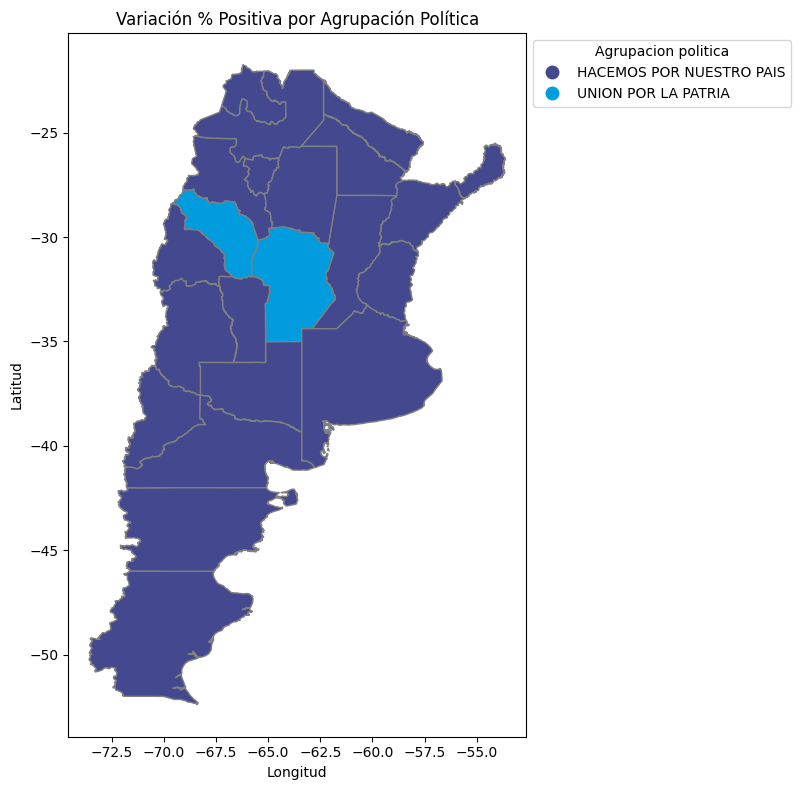

In [ ]:
import matplotlib.colors as colors
fig, ax =  plt.subplots(figsize=(10, 8))
prov_gan.plot(ax=ax,
    column='agrupacion_nombre',categorical=True,
    #color=prov_gan['color'],
    cmap=colors.ListedColormap(colores),
    legend=True,
    legend_kwds={"loc":"upper left","bbox_to_anchor":(1,1)},#para que no pise mapa
    linewidth=1,
    edgecolor='0.5',
    )

# Titulos
leg1 = ax.get_legend()
leg1.set_title("Agrupacion politica")
ax.set_title('Variación % Positiva por Agrupación Política')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()
#https://gis.stackexchange.com/questions/417574/showing-the-legend-in-geopandas-when-color-is-given-by-value

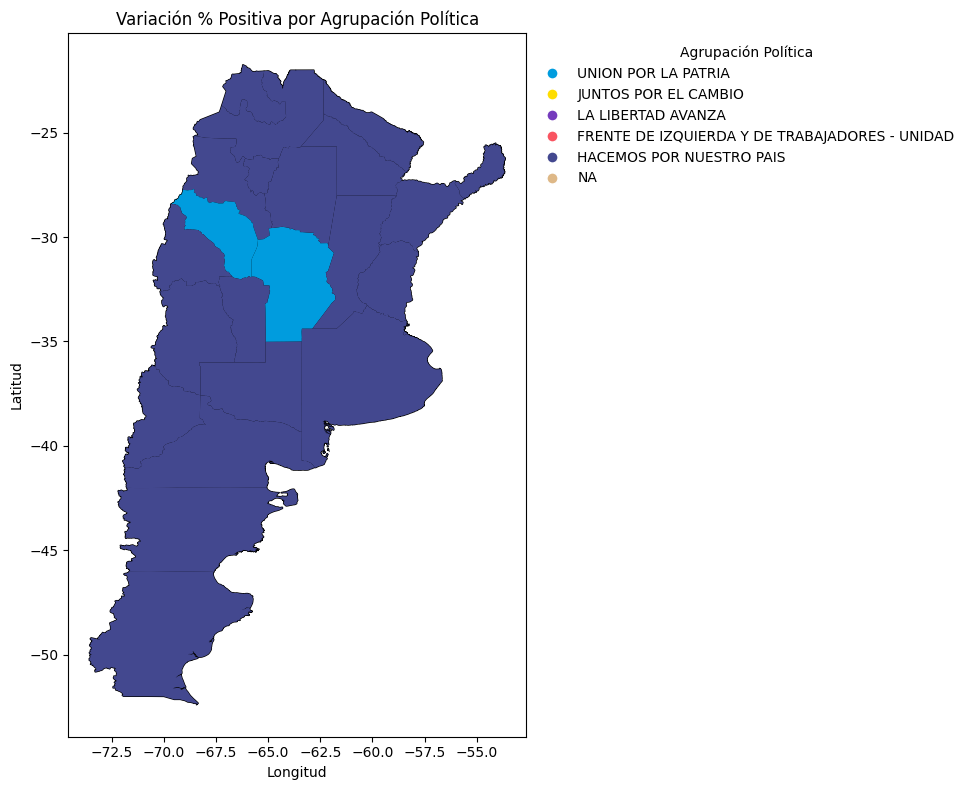

In [ ]:
#intento mapa considerando la variacion(no funciono)
# Grafico
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
prov_gan.plot(column='variacion', ax=ax, cmap='Wistia', legend=False)
prov_gan.plot(facecolor='none', edgecolor='black', ax=ax)
prov_gan.plot(marker='o', color=prov_gan['color'], markersize=5, ax=ax)

# leyenda del mapa
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=agrupacion)
           for agrupacion, color in colores_agrupacion.items()]
ax.legend(handles=handles, title='Agrupación Política', loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Titulos
ax.set_title('Variación % Positiva por Agrupación Política')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()


In [ ]:
# seleccionamos el partido de hacemos por nuestro pais
df_hacemos = resultados[resultados['agrupacion_nombre'] == 'HACEMOS POR NUESTRO PAIS']
#top5 diferencia
top5_votos = df_hacemos.sort_values(by='diferencia', ascending=False).head(5)
#top 5 por variación
top5_variacion = df_hacemos.sort_values(by='variacion', ascending=False).head(5)

<ipython-input-36-9f7a794ed77e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top5_votos['distrito_nombre'], rotation=45, ha='right')
<ipython-input-36-9f7a794ed77e>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top5_variacion['distrito_nombre'], rotation=45, ha='right')


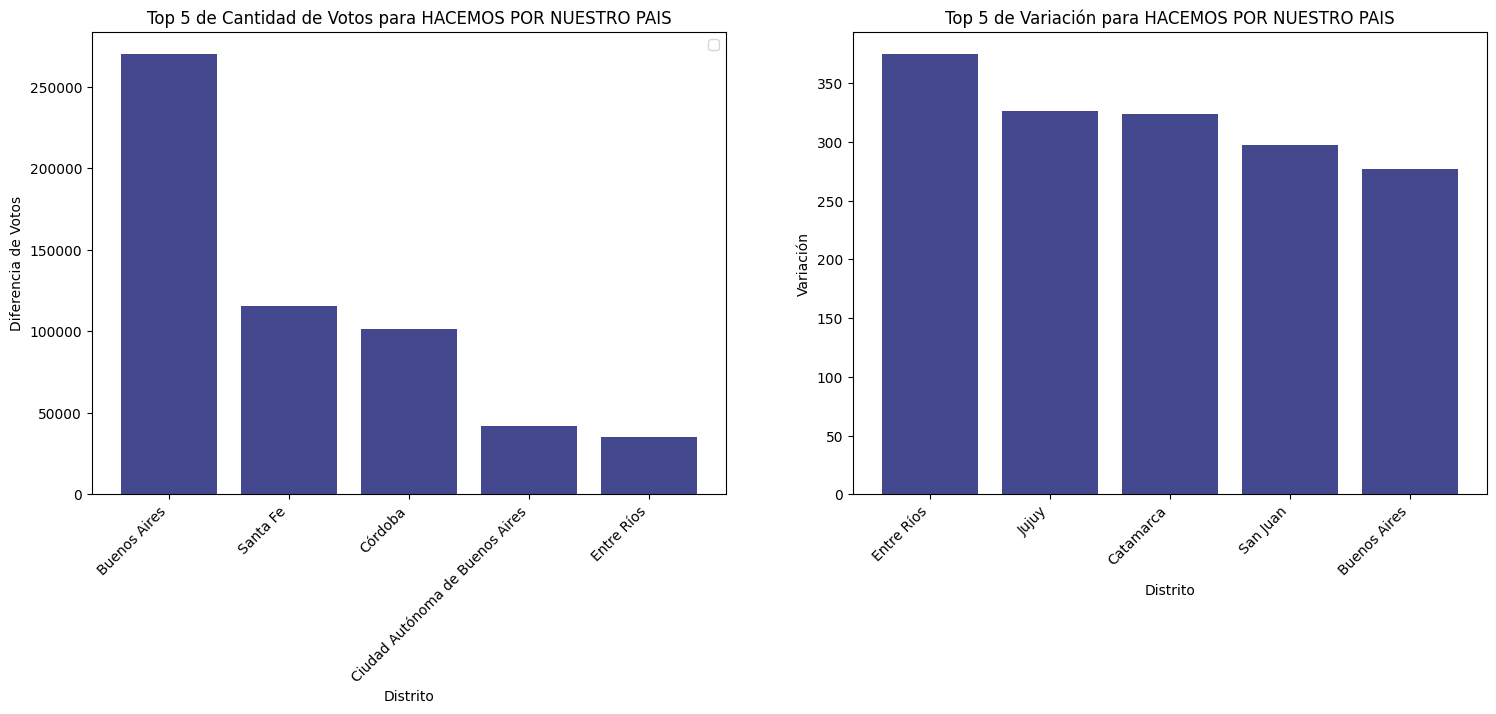

In [ ]:
# color del partido
color_hacemos = '#43488f'

# crear subgráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico  top 5 de cantidad de votos
axs[0].bar(top5_votos['distrito_nombre'], top5_votos['diferencia'], color=color_hacemos)
axs[0].set_xlabel('Distrito')
axs[0].set_ylabel('Diferencia de Votos')
axs[0].set_title('Top 5 de Cantidad de Votos para HACEMOS POR NUESTRO PAIS')
axs[0].set_xticklabels(top5_votos['distrito_nombre'], rotation=45, ha='right')
axs[0].legend()

# Gráfico top 5 de variación
axs[1].bar(top5_variacion['distrito_nombre'], top5_variacion['variacion'], color=color_hacemos)
axs[1].set_xlabel('Distrito')
axs[1].set_ylabel('Variación')
axs[1].set_title('Top 5 de Variación para HACEMOS POR NUESTRO PAIS')
#axs[1].set_xticks([pos + bar_width / 2 for pos in bar_positions_x])
axs[1].set_xticklabels(top5_variacion['distrito_nombre'], rotation=45, ha='right')

plt.show()


In [ ]:
top5_variacion

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
36,Entre Ríos,POSITIVO,HACEMOS POR NUESTRO PAIS,44720,9425,374.482759,35295
46,Jujuy,POSITIVO,HACEMOS POR NUESTRO PAIS,30775,7215,326.541927,23560
6,Catamarca,POSITIVO,HACEMOS POR NUESTRO PAIS,14967,3530,323.994334,11437
86,San Juan,POSITIVO,HACEMOS POR NUESTRO PAIS,27427,6896,297.723318,20531
1,Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,367457,97586,276.546841,269871


In [ ]:
top5_votos

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
1,Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,367457,97586,276.546841,269871
101,Santa Fe,POSITIVO,HACEMOS POR NUESTRO PAIS,183205,67563,171.161731,115642
31,Córdoba,POSITIVO,HACEMOS POR NUESTRO PAIS,665717,564182,17.996852,101535
21,Ciudad Autónoma de Buenos Aires,POSITIVO,HACEMOS POR NUESTRO PAIS,57607,15886,262.627471,41721
36,Entre Ríos,POSITIVO,HACEMOS POR NUESTRO PAIS,44720,9425,374.482759,35295


In [ ]:
#La minima vairacion en cada provincia y a que partido corresponde
indices_min_variacion = resultados.groupby('distrito_nombre')['variacion'].idxmin()
min_variacion_distrito = resultados.loc[indices_min_variacion]

In [ ]:
min_variacion_distrito

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
2,Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,2374023,2567840,-7.547861,-193817
7,Catamarca,POSITIVO,JUNTOS POR EL CAMBIO,39960,44544,-10.290948,-4584
10,Chaco,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5482,7710,-28.897536,-2228
17,Chubut,POSITIVO,JUNTOS POR EL CAMBIO,70717,76603,-7.683772,-5886
20,Ciudad Autónoma de Buenos Aires,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,66145,78014,-15.213936,-11869
28,Corrientes,POSITIVO,LA LIBERTAD AVANZA,187916,181456,3.560092,6460
32,Córdoba,POSITIVO,JUNTOS POR EL CAMBIO,519252,515456,0.736435,3796
37,Entre Ríos,POSITIVO,JUNTOS POR EL CAMBIO,250512,257263,-2.624163,-6751
42,Formosa,POSITIVO,JUNTOS POR EL CAMBIO,55097,68739,-19.846084,-13642
45,Jujuy,POSITIVO,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,16006,28982,-44.772617,-12976


In [ ]:
#Unificacion con georeferencia
prov_per = pd.merge( df_provincias,min_variacion_distrito, right_on='distrito_nombre', left_on='provincia', how='left')
prov_per=prov_per[prov_per['provincia']!='Tierra del Fuego']
prov_per['variacion'] = prov_per['variacion'].fillna(0)

In [ ]:
# Color del partido
prov_per['color'] = prov_per['agrupacion_nombre'].map(colores_agrupacion)

In [ ]:
colores=[ '#f95461','#009cde','#fedd00','#43488f', '#753bbd']

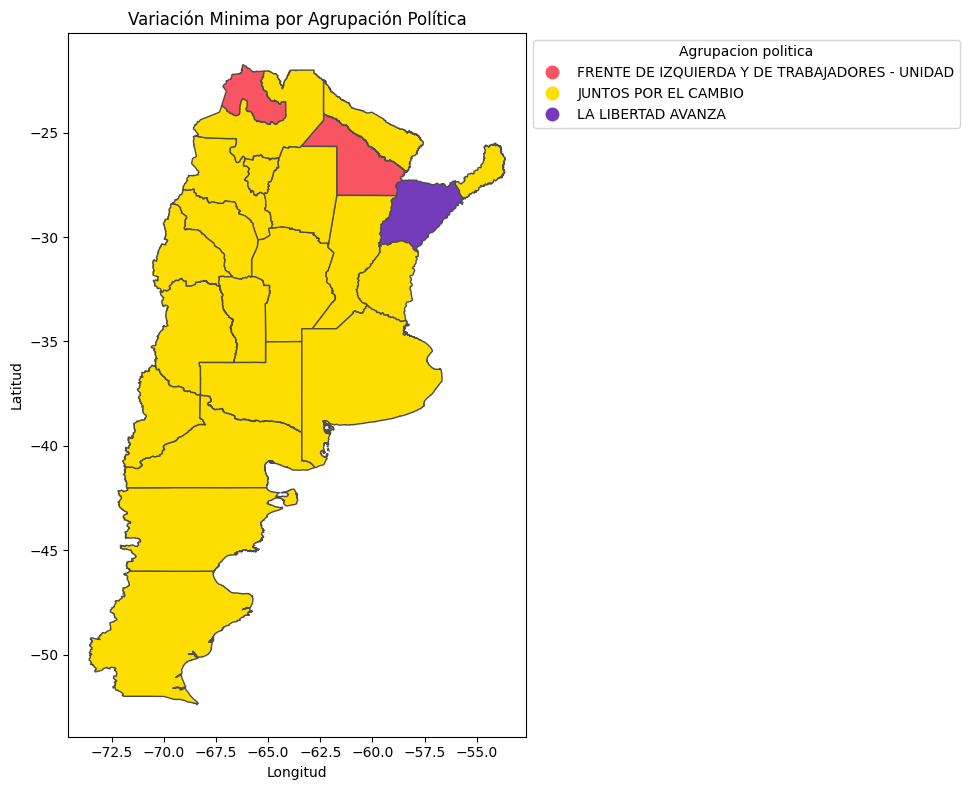

In [ ]:
fig, ax =  plt.subplots(figsize=(10, 8))
prov_per.plot(ax=ax,
    column='agrupacion_nombre',categorical=True,
    cmap=colors.ListedColormap(colores),
    linewidth=1,
    edgecolor='0.3',
    legend=True,
    legend_kwds={"loc":"upper left","bbox_to_anchor":(1,1)},#para que no pise mapa
    )

# Titulos
leg1 = ax.get_legend()
leg1.set_title("Agrupacion politica")
ax.set_title('Variación Minima por Agrupación Política')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.tight_layout()
plt.show()

In [ ]:
#https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

In [ ]:
# Juntos por el cambio
df_juntos = resultados[resultados['agrupacion_nombre'] == 'JUNTOS POR EL CAMBIO']
#Tio 5 votos
top5_votos = df_juntos.sort_values(by='diferencia', ascending=True).head(5)
# Top 5 variacion
top5_variacion = df_juntos.sort_values(by='variacion', ascending=True).head(5)

In [ ]:
top5_votos

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
2,Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,2374023,2567840,-7.547861,-193817
117,Tucumán,POSITIVO,JUNTOS POR EL CAMBIO,153130,206969,-26.013074,-53839
22,Ciudad Autónoma de Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,767367,813264,-5.643555,-45897
102,Santa Fe,POSITIVO,JUNTOS POR EL CAMBIO,544677,579867,-6.068633,-35190
67,Misiones,POSITIVO,JUNTOS POR EL CAMBIO,104787,122528,-14.479139,-17741


<ipython-input-48-cfebfc3fcec8>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(top5_votos['distrito_nombre'], rotation=45, ha='right')
<ipython-input-48-cfebfc3fcec8>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(top5_variacion['distrito_nombre'], rotation=45, ha='right')


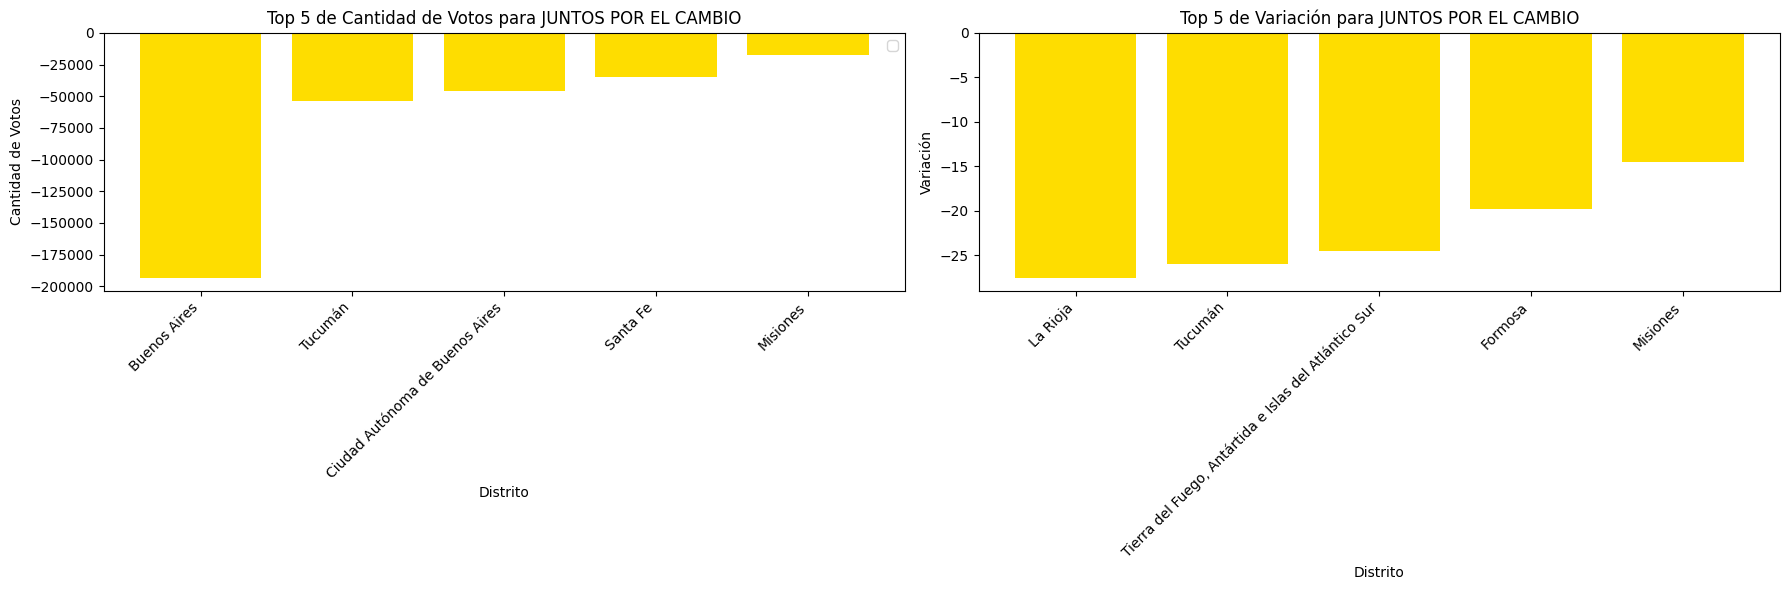

In [ ]:
# Seteamos color de juntos por el cambio
color_cambio = '#fedd00'

# Crear subgráficos uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
# Gráfico  top 5 de cantidad de votos
axs[0].bar( top5_votos['distrito_nombre'],top5_votos['diferencia'], color=color_cambio)
axs[0].set_xlabel('Distrito')
axs[0].set_ylabel('Cantidad de Votos')
axs[0].set_title('Top 5 de Cantidad de Votos para JUNTOS POR EL CAMBIO')
axs[0].set_xticklabels(top5_votos['distrito_nombre'], rotation=45, ha='right')
axs[0].legend()

# Gráfico top 5 5 variacion
axs[1].bar(top5_variacion['distrito_nombre'], top5_variacion['variacion'], color=color_cambio)
axs[1].set_xlabel('Distrito')
axs[1].set_ylabel('Variación')
axs[1].set_title('Top 5 de Variación para JUNTOS POR EL CAMBIO')
axs[1].set_xticklabels(top5_variacion['distrito_nombre'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
df_juntos

,distrito_nombre,votos_tipo,agrupacion_nombre,votos_gral,votos_paso,variacion,diferencia
2,Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,2374023,2567840,-7.547861,-193817
7,Catamarca,POSITIVO,JUNTOS POR EL CAMBIO,39960,44544,-10.290948,-4584
12,Chaco,POSITIVO,JUNTOS POR EL CAMBIO,171756,165721,3.641663,6035
17,Chubut,POSITIVO,JUNTOS POR EL CAMBIO,70717,76603,-7.683772,-5886
22,Ciudad Autónoma de Buenos Aires,POSITIVO,JUNTOS POR EL CAMBIO,767367,813264,-5.643555,-45897
27,Corrientes,POSITIVO,JUNTOS POR EL CAMBIO,224519,213104,5.356540,11415
32,Córdoba,POSITIVO,JUNTOS POR EL CAMBIO,519252,515456,0.736435,3796
37,Entre Ríos,POSITIVO,JUNTOS POR EL CAMBIO,250512,257263,-2.624163,-6751
42,Formosa,POSITIVO,JUNTOS POR EL CAMBIO,55097,68739,-19.846084,-13642
47,Jujuy,POSITIVO,JUNTOS POR EL CAMBIO,90095,100408,-10.271094,-10313
